# Data Plotting and Fitting Exercise

Here is an example of fitting data using python. 
Here is an outline of the method:
    1. Load needed libraries for analysis and plotting 
    2. Define a fitting function
    3. Load the data file (or define the data manually if easier)
    4. Perform the fit and plot the result
    
Load the needed libraries:

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
from pylab import rcParams
rcParams['figure.figsize']=10,8

Now I will define three different fitting functions:

In [47]:
def linearFit(t, m, b): 
    return m*t + b

def expDecay(t, a, b, c):
    return a*np.exp(-b*t) 
def gaussianWithOffset(t, a, c, sigma):
    return a*np.exp(-((t-c)**2)/(2*sigma**2))

Now I read in the needed data file; the "skiprows" parameter allows
me to ignore the header line which labels the columns.

In [48]:
data = np.genfromtxt('002Data.txt', skip_header=1)

This command extracts the first column of data;
python indexes starting at zero, so be careful!

In [49]:
data[ : ,0]  

array([ 0.015,  0.172,  0.329,  0.486,  0.643,  0.8  ,  0.958,  1.115,
        1.272,  1.429,  1.586,  1.743,  1.9  ,  2.057,  2.214,  2.317,
        2.528,  2.685,  2.843,  3.   ])

In [50]:
x = data[ : ,0]
z = data[ : ,1]
u = data[ : ,2]
v = data[ : ,3]
y = data[ : ,4]
eValue = data [ : ,5]

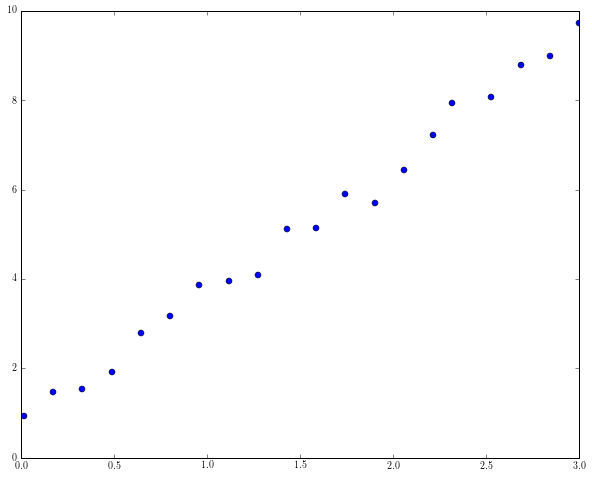

In [51]:
plt.plot(x,z,'o')
plt.show()

In [52]:
fitParams, fitCovariances = curve_fit(linearFit, x, z)
print(fitParams)
print(fitCovariances)

[ 2.92592864  0.73869777]
[[ 0.00440717 -0.00663102]
 [-0.00663102  0.01357327]]


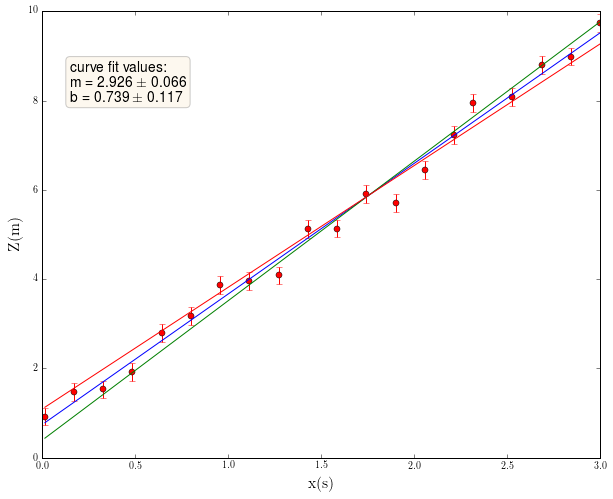

In [53]:
plt.ylabel(r'$\mathrm{Z (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{x (s)}$', fontsize = 16)
#plt.xlim(0,3.5)
# plot the data as red circles with errorbars in the vertical direction
plt.errorbar(x, z, fmt = 'ro', yerr = 0.2)
# now plot the best fit curve and also +- 3 sigma curves
# the square root of the diagonal covariance matrix element 
# is the uncertianty on the corresponding fit parameter.
sigma = np.sqrt([fitCovariances[0,0], fitCovariances[1,1]])

plt.plot(x, linearFit(x, fitParams[0], fitParams[1]),\
         x, linearFit(x, fitParams[0] + 3*sigma[0], fitParams[1] - 3*sigma[1]),\
         x, linearFit(x, fitParams[0] - 3*sigma[0], fitParams[1] + 3*sigma[1])\
         )
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(0.15, 8.0, 
    ("curve fit values:\n m = %.3f\t $\pm$ %.3f\n b = %.3f\t $\pm$ %.3f" 
    % (fitParams[0], sigma[0], fitParams[1], sigma[1])), fontsize=14,bbox=props )

# save plot to a file
plt.savefig('dataFitted.png', bbox_inches=0, dpi=600)
plt.show()

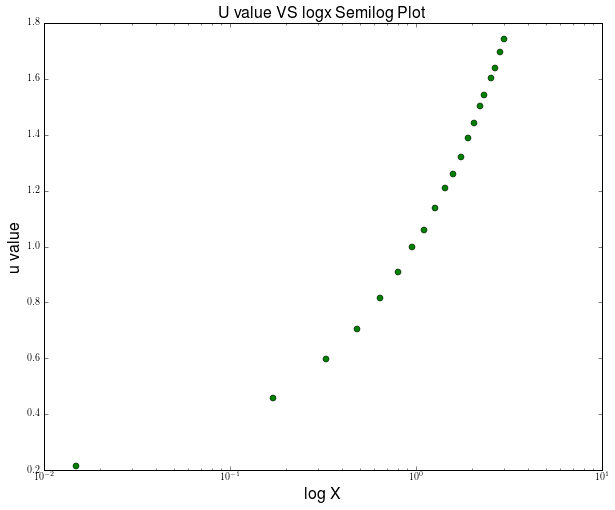

In [54]:
plt.semilogx(x,u,"go")
plt.xlabel('log X',fontsize=16)
plt.ylabel("u value",fontsize=16)
plt.title('U value VS logx Semilog Plot',fontsize=16)
plt.savefig('semiXplot.png', bbox_inches=0, dpi=600)

plt.show()

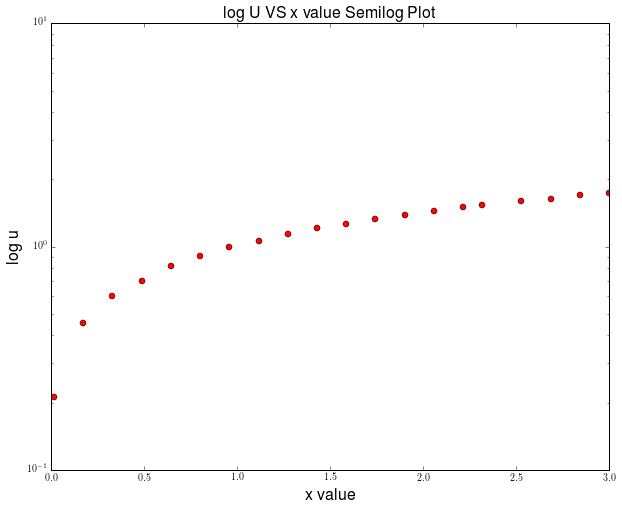

In [55]:

plt.semilogy(x,u,'ro')
plt.xlabel('x value',fontsize=16)
plt.title('log U VS x value Semilog Plot',fontsize=16)
plt.ylabel('log u',fontsize=16)
plt.savefig('semiYplot.png', bbox_inches=0, dpi=600)
plt.show()

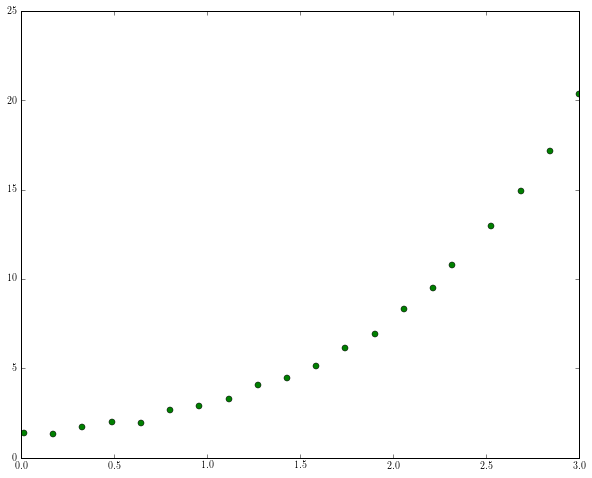

In [56]:
plt.plot(x,v,'go')
plt.show()

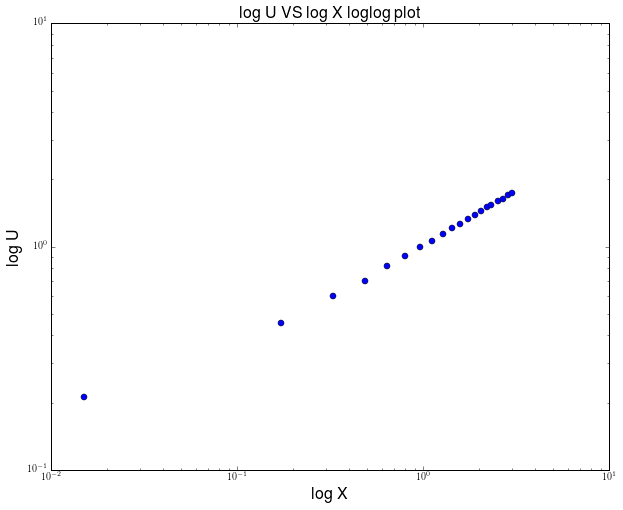

In [57]:
plt.loglog(x,u,"bo")
plt.xlabel('log X',fontsize=16)
plt.ylabel('log U',fontsize=16)
plt.title('log U VS log X loglog plot',fontsize=16)
plt.savefig('loglogplot.png', bbox_inches=0, dpi=600)
plt.show()

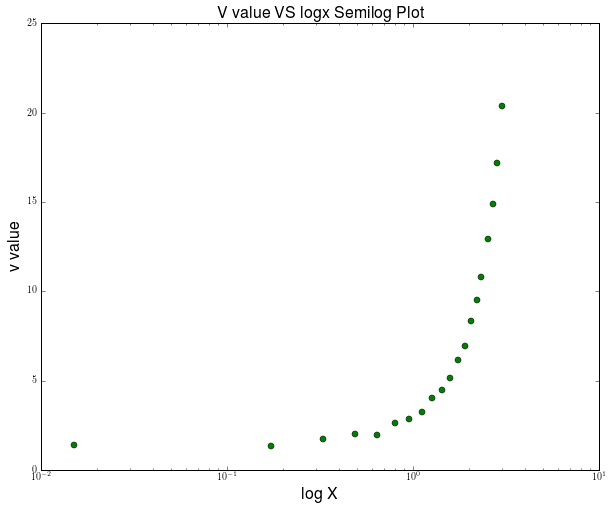

In [58]:
plt.semilogx(x,v,"go")
plt.xlabel('log X',fontsize=16)
plt.ylabel("v value",fontsize=16)
plt.title('V value VS logx Semilog Plot',fontsize=16)
plt.savefig('semiXplot2.png', bbox_inches=0, dpi=600)

plt.show()

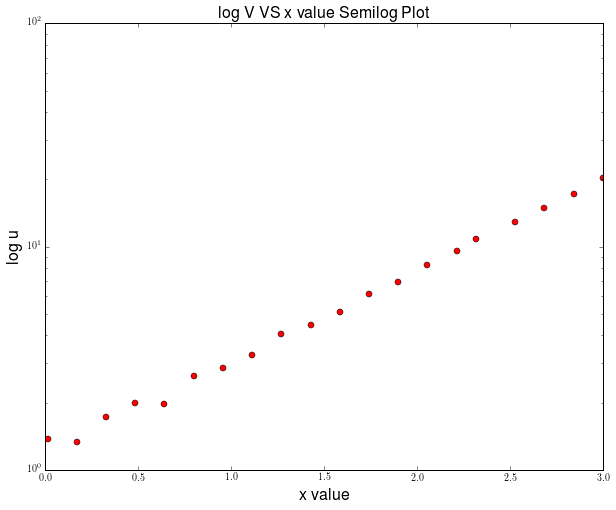

In [59]:
plt.semilogy(x,v,'ro')
plt.xlabel('x value',fontsize=16)
plt.title('log V VS x value Semilog Plot',fontsize=16)
plt.ylabel('log u',fontsize=16)
plt.savefig('semiYplot2.png', bbox_inches=0, dpi=600)
plt.show()

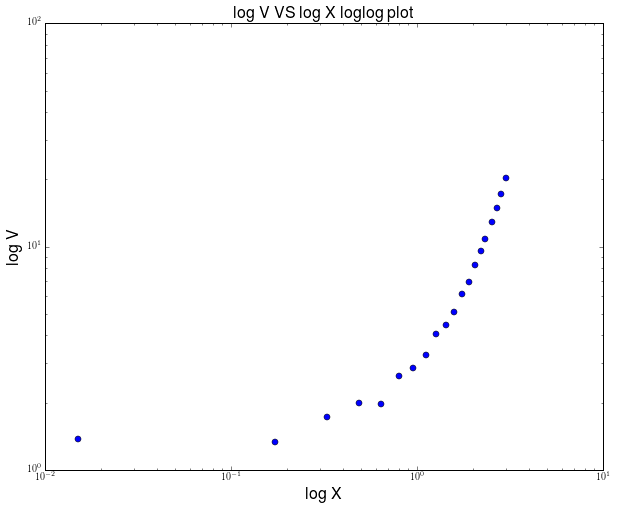

In [60]:
plt.loglog(x,v,"bo")
plt.xlabel('log X',fontsize=16)
plt.ylabel('log V',fontsize=16)
plt.title('log V VS log X loglog plot',fontsize=16)
plt.savefig('loglogplot2.png', bbox_inches=0, dpi=600)
plt.show()

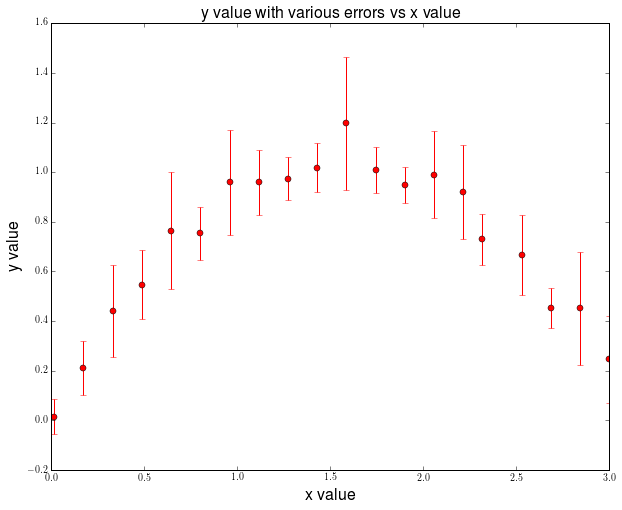

In [61]:
plt.errorbar(x,y,fmt='ro',yerr=eValue)
plt.xlabel('x value',fontsize=16)
plt.ylabel('y value',fontsize=16)
plt.title('y value with various errors vs x value',fontsize=16)
plt.savefig('Question3.png',bbox_inches=0, dpi=600)
plt.show()

In [62]:
fitParams2, fitCovariances2 = curve_fit(gaussianWithOffset, x, y)
print(fitParams2)
print(fitCovariances2)

[ 1.10721112  1.57239239  0.87295933]
[[  1.31089084e-03  -3.30561364e-05  -8.56876101e-04]
 [ -3.30561364e-05   1.11606237e-03   6.74304894e-05]
 [ -8.56876101e-04   6.74304894e-05   1.48324146e-03]]


[ 0.03620623  0.03340752  0.03851287]


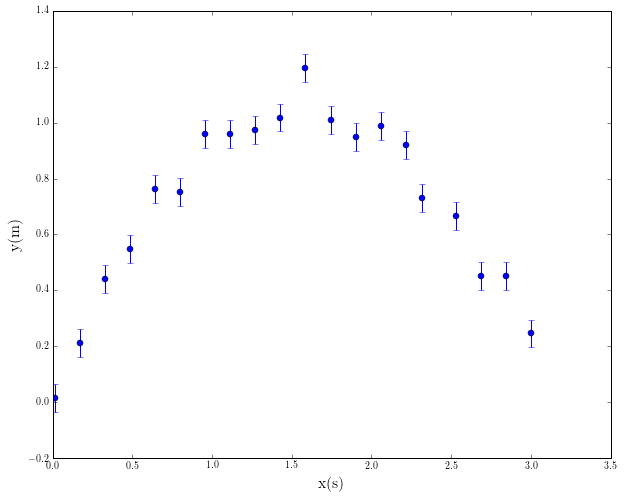

In [67]:
plt.ylabel(r'$\mathrm{y (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{x (s)}$', fontsize = 16)
plt.xlim(0,3.5)
# plot the data as red circles with errorbars in the vertical direction
plt.errorbar(x, y, fmt = 'bo', yerr = 0.05)
# now plot the best fit curve and also +- 3 sigma curves
# the square root of the diagonal covariance matrix element 
# is the uncertianty on the corresponding fit parameter.
sigma2 = np.sqrt([fitCovariances2[0,0], fitCovariances2[1,1],fitCovariances2[2,2]])
print(sigma2)



In [73]:
plt.plot(x, gaussianWithOffset(x, fitParams2[0], fitParams2[1],sigma2[1]), fitParams2[2],\
         x, gaussianWithOffset(x, fitParams2[0] + 3*sigma2[0], fitParams2[1] + 3*sigma2[1], fitParams2[2]+3*sigma2[2],\
                               gaussianWithOffset(x, fitParams2[0] - 3*sigma2[0], fitParams2[1] - 3*sigma2[1], fitParams2[2]-3*sigma2[2])
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
#plt.text(0.15, 8.0, 
   # ("curve fit values:\n m = %.3f\t $\pm$ %.3f\n b = %.3f\t $\pm$ %.3f"  % (fitParams[0], sigma[0], fitParams[1], sigma[1])), fontsize=14,bbox=props )

# save plot to a file
#plt.savefig('dataFitted2.png', bbox_inches=0, dpi=600)
                               plt.show()


SyntaxError: invalid syntax (<ipython-input-73-64778539a54d>, line 8)